
Imports e definição do dataset.

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Carregamento do dataset cifar-10

In [7]:
# Carregar o conjunto de dados CIFAR-10
cifar10 = keras.datasets.cifar10
#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


O código abaixo mostra as 10 primeiras imagens de treino e teste do cifar-10

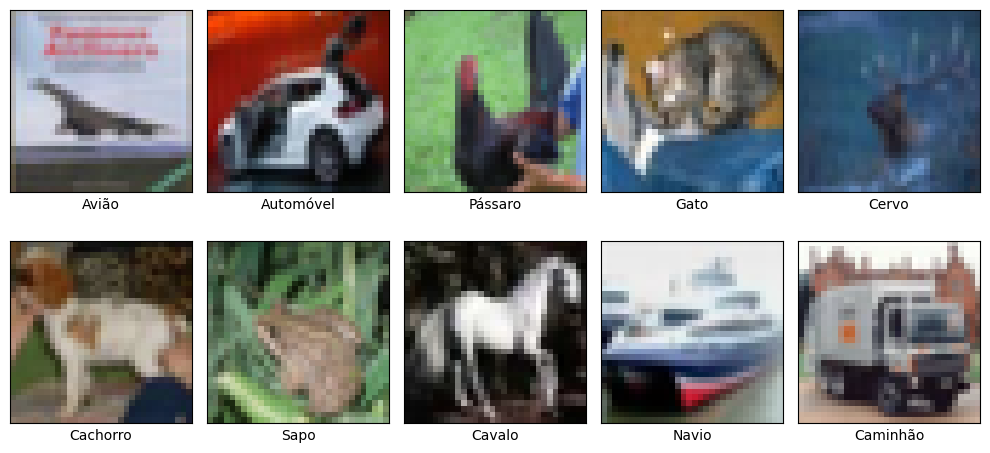

In [8]:
# Defina as classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(10):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])
    plt.xlabel(class_names[i])

plt.tight_layout()
plt.show()

Abaixo, convertemos os rótulos escalares (números de 0 a 9) para one-hot encoding.

Não é necessário realizar este passo, caso seja utilizada a função de custo esparse_categorical_cross_entropy

In [9]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

Função que retorna uma rede neural para o cifar-10

In [10]:
# Crie o modelo de rede neural convolucional simples
def get_cifar10_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#(32, 32, 3) porque as imagens são 32X32 e RGB, portanto, tendo 3 canais de cor
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',#pode ser substituída pela esparse_categorical_cross_entropy
                  metrics=['accuracy'])

    model.summary()

    return model

Trecho para treinar e avaliar a rede neural.
O treino é realizado com os dados de treino e a avaliação do modelo é realizada nos dados de teste.

In [11]:
# # Treine o modelo
# model = get_cifar10_network()
# model.fit(train_images, train_labels, epochs=10)

# # Avalie o modelo no conjunto de teste
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

# Loading Datasets

Na célula abaixo, adicione o código para carregar os demais datasets

In [12]:
import numpy as np

#Carregando demais datasets
mnist = keras.datasets.mnist
(mnist_x_train, mnist_y_train),(mnist_x_test, mnist_y_test) = mnist.load_data()

fashion_mnist = keras.datasets.fashion_mnist
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()

cifar10 = keras.datasets.cifar10
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

cifar100 = keras.datasets.cifar100
(cifar100_x_train, cifar100_y_train), (cifar100_x_test, cifar100_y_test) = cifar100.load_data()

# Normalização [0-255] -> [0-255]
mnist_x_train, mnist_x_test = mnist_x_train / 255.0, mnist_x_test / 255.0
fashion_x_train, fashion_x_test = fashion_x_train / 255.0, fashion_x_test / 255.0
cifar10_x_train, cifar10_x_test = cifar10_x_train / 255.0, cifar10_x_test / 255.0
cifar100_x_train, cifar100_x_test = cifar100_x_train / 255.0, cifar100_x_test / 255.0

# Adiciona dimensão de canal para MNIST e Fashion-MNIST pois são imagens em escala de cinza no formato 28x28
# [28x28 -> 28x28x1]
mnist_x_train = np.expand_dims(mnist_x_train, axis=-1)
mnist_x_test = np.expand_dims(mnist_x_test, axis=-1)
fashion_x_train = np.expand_dims(fashion_x_train, axis=-1)
fashion_x_test = np.expand_dims(fashion_x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Viewing Databases

In [13]:
# Definir função para visualizar classes do dataset
def show_database_preview(class_names, images, labels):
  # Crie um dicionário para mapear as classes para as imagens correspondentes
  class_to_image = {}
  for i in range(10):
      index = (labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
      class_to_image[i] = images[index]

  # Mostre uma imagem de cada classe
  plt.figure(figsize=(10, 5))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.xticks([])  # Remova os rótulos do eixo x
      plt.yticks([])  # Remova os rótulos do eixo y
      plt.imshow(class_to_image[i])
      plt.xlabel(class_names[i])

  plt.tight_layout()
  plt.show()



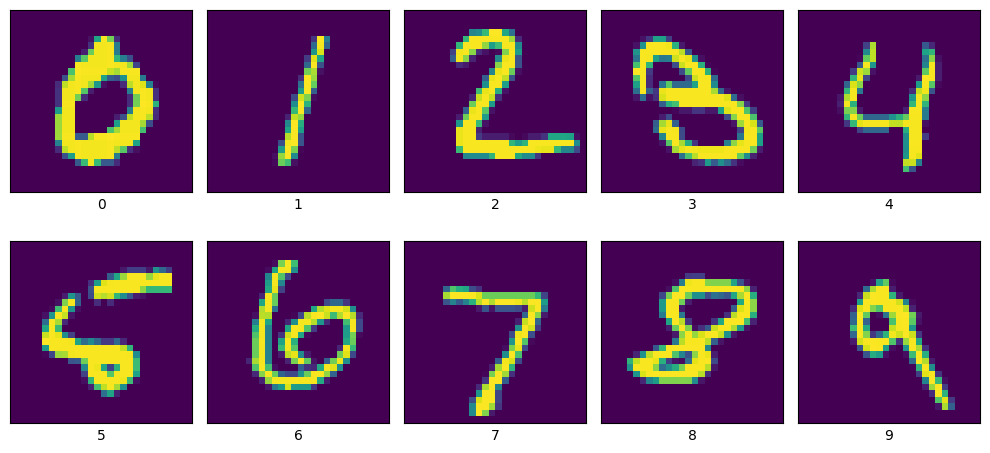

In [14]:
show_database_preview(range(10), mnist_x_test, mnist_y_test)

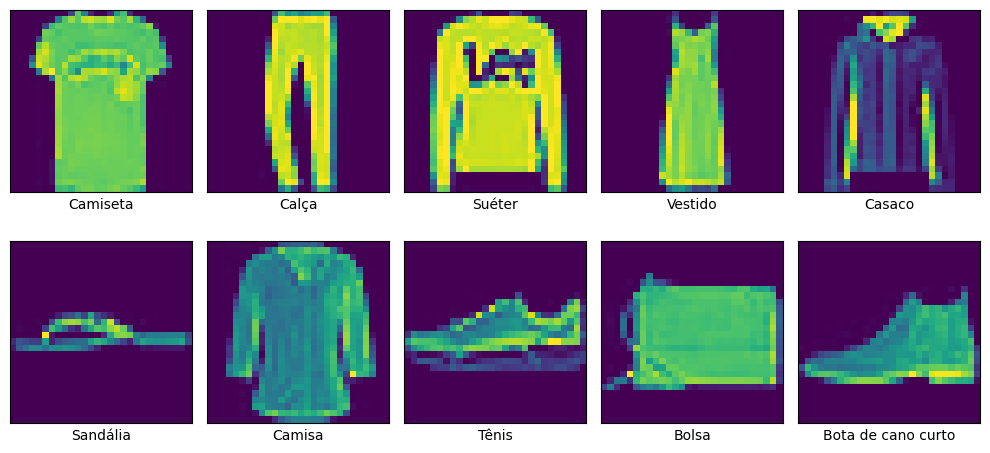

In [15]:
show_database_preview([
    "Camiseta",   # 0
    "Calça",           # 1
    "Suéter",          # 2
    "Vestido",         # 3
    "Casaco",          # 4
    "Sandália",        # 5
    "Camisa",          # 6
    "Tênis",           # 7
    "Bolsa",           # 8
    "Bota de cano curto" # 9
], fashion_x_test, fashion_y_test)

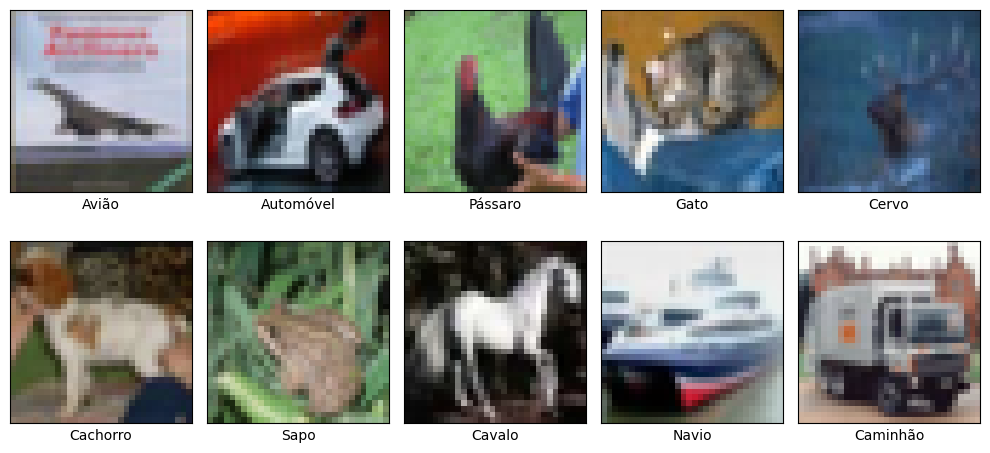

In [16]:
show_database_preview([
    "Avião",      # 0
    "Automóvel",  # 1
    "Pássaro",    # 2
    "Gato",       # 3
    "Cervo",      # 4
    "Cachorro",   # 5
    "Sapo",       # 6
    "Cavalo",     # 7
    "Navio",      # 8
    "Caminhão"    # 9
], cifar10_x_test, cifar10_y_test)

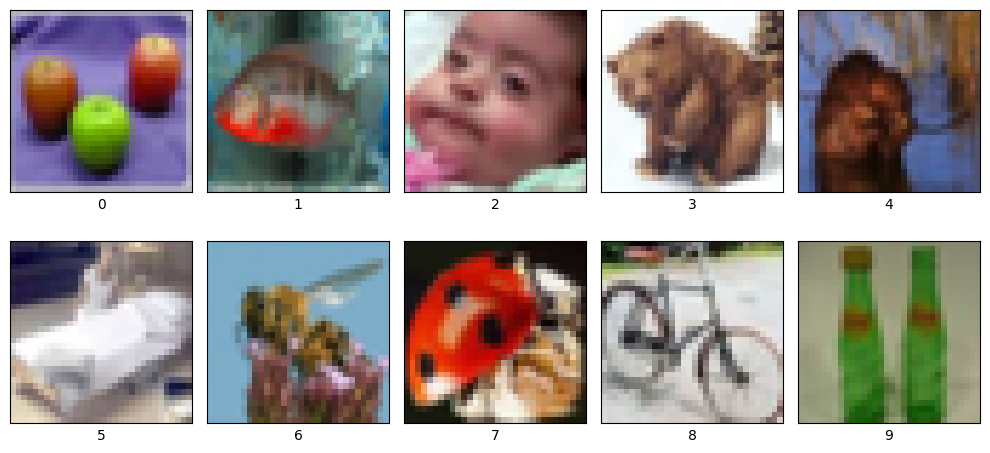

In [17]:
show_database_preview(range(10), cifar100_x_test, cifar100_y_test)
# Aqui mostram 10 exemplos, mas na verdade são 100 classes

# Defining Networks

Tarefa
Escreva código para executar redes neurais nos seguintes datasets:

- MNIST (pode aproveitar o codigo existente);
- Fashion MNIST;
- CIFAR-10;
- CIFAR-100.
Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset. O notebook deve ser entregue com a rede neural que obteve a melhor performance em cada conjunto de dados.

IMPORTANTE: as funções não devem TREINAR nem AVALIAR as redes neurais, apenas instanciá-las e retorná-las.

Ao final, preencha o dict results com o desempenho encontrado em cada execução.

## CNN para MNIST

In [19]:
def get_mnist_network():
  network = keras.Sequential([
    # Camada Convolucional
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    # Camadas densas
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

## CNN para Fashion Mnist

In [18]:
def get_fashion_mnist_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

## CNN para Cifar10

In [20]:
def get_cifar10_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

## CNN para Cifar100

In [21]:
def get_cifar100_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(100, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

# Training Networks

In [22]:
import time

def training_network(nome, get_model_fn, train_images, train_labels, test_images, test_labels, epochs=10):
    print("\n" + "="*50)
    print(f"Treinando e avaliando {nome}")
    print("="*50)

    model = get_model_fn()

    start_time = time.time()

    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), verbose=2)

    end_time = time.time()
    elapsed_time = end_time - start_time

    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Acurácia no conjunto de teste ({nome}): {test_accuracy * 100:.2f}%")
    print(f"Tempo total de treino ({nome}): {elapsed_time:.2f} segundos")

In [23]:
training_network("MNIST", get_mnist_network, mnist_x_train, mnist_y_train, mnist_x_test, mnist_y_test)


Treinando e avaliando MNIST


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 27s - 14ms/step - accuracy: 0.9389 - loss: 0.2095 - val_accuracy: 0.9734 - val_loss: 0.0863
Epoch 2/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9780 - loss: 0.0743 - val_accuracy: 0.9798 - val_loss: 0.0616
Epoch 3/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9851 - loss: 0.0505 - val_accuracy: 0.9834 - val_loss: 0.0491
Epoch 4/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9831 - val_loss: 0.0498
Epoch 5/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 6/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9842 - val_loss: 0.0481
Epoch 7/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9858 - val_loss: 0.0438
Epoch 8/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9853 - val_loss: 0.0535
Epoch 9/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9974 - loss: 0.0084 - val_a

In [24]:
training_network("Fashion-MNIST", get_fashion_mnist_network, fashion_x_train, fashion_y_train, fashion_x_test, fashion_y_test)


Treinando e avaliando Fashion-MNIST
Epoch 1/10
1875/1875 - 58s - 31ms/step - accuracy: 0.8370 - loss: 0.4482 - val_accuracy: 0.8608 - val_loss: 0.3911
Epoch 2/10
1875/1875 - 55s - 29ms/step - accuracy: 0.8918 - loss: 0.2954 - val_accuracy: 0.8875 - val_loss: 0.2952
Epoch 3/10
1875/1875 - 82s - 44ms/step - accuracy: 0.9080 - loss: 0.2497 - val_accuracy: 0.9040 - val_loss: 0.2700
Epoch 4/10
1875/1875 - 55s - 29ms/step - accuracy: 0.9183 - loss: 0.2186 - val_accuracy: 0.9033 - val_loss: 0.2605
Epoch 5/10
1875/1875 - 83s - 44ms/step - accuracy: 0.9287 - loss: 0.1923 - val_accuracy: 0.9070 - val_loss: 0.2605
Epoch 6/10
1875/1875 - 56s - 30ms/step - accuracy: 0.9356 - loss: 0.1715 - val_accuracy: 0.9145 - val_loss: 0.2443
Epoch 7/10
1875/1875 - 54s - 29ms/step - accuracy: 0.9433 - loss: 0.1510 - val_accuracy: 0.9125 - val_loss: 0.2573
Epoch 8/10
1875/1875 - 54s - 29ms/step - accuracy: 0.9499 - loss: 0.1342 - val_accuracy: 0.9166 - val_loss: 0.2584
Epoch 9/10
1875/1875 - 82s - 44ms/step - ac

In [25]:
training_network("CIFAR-10", get_cifar10_network, cifar10_x_train, cifar10_y_train, cifar10_x_test, cifar10_y_test)


Treinando e avaliando CIFAR-10
Epoch 1/10
1563/1563 - 69s - 44ms/step - accuracy: 0.4928 - loss: 1.4152 - val_accuracy: 0.5969 - val_loss: 1.1423
Epoch 2/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6240 - loss: 1.0723 - val_accuracy: 0.6543 - val_loss: 1.0046
Epoch 3/10
1563/1563 - 82s - 52ms/step - accuracy: 0.6718 - loss: 0.9414 - val_accuracy: 0.6626 - val_loss: 0.9609
Epoch 4/10
1563/1563 - 67s - 43ms/step - accuracy: 0.7084 - loss: 0.8434 - val_accuracy: 0.6646 - val_loss: 0.9644
Epoch 5/10
1563/1563 - 67s - 43ms/step - accuracy: 0.7316 - loss: 0.7683 - val_accuracy: 0.6987 - val_loss: 0.8765
Epoch 6/10
1563/1563 - 65s - 42ms/step - accuracy: 0.7577 - loss: 0.6962 - val_accuracy: 0.7002 - val_loss: 0.8916
Epoch 7/10
1563/1563 - 65s - 42ms/step - accuracy: 0.7799 - loss: 0.6355 - val_accuracy: 0.7055 - val_loss: 0.8988
Epoch 8/10
1563/1563 - 67s - 43ms/step - accuracy: 0.7997 - loss: 0.5749 - val_accuracy: 0.7097 - val_loss: 0.8957
Epoch 9/10
1563/1563 - 65s - 42ms/step - accurac

In [26]:
training_network("CIFAR-100", get_cifar100_network, cifar100_x_train, cifar100_y_train, cifar100_x_test, cifar100_y_test)


Treinando e avaliando CIFAR-100
Epoch 1/10
1563/1563 - 75s - 48ms/step - accuracy: 0.1586 - loss: 3.6154 - val_accuracy: 0.2441 - val_loss: 3.1138
Epoch 2/10
1563/1563 - 72s - 46ms/step - accuracy: 0.2847 - loss: 2.8902 - val_accuracy: 0.3070 - val_loss: 2.7821
Epoch 3/10
1563/1563 - 73s - 46ms/step - accuracy: 0.3503 - loss: 2.5725 - val_accuracy: 0.3404 - val_loss: 2.6472
Epoch 4/10
1563/1563 - 71s - 46ms/step - accuracy: 0.3969 - loss: 2.3553 - val_accuracy: 0.3575 - val_loss: 2.5815
Epoch 5/10
1563/1563 - 83s - 53ms/step - accuracy: 0.4324 - loss: 2.1821 - val_accuracy: 0.3681 - val_loss: 2.5627
Epoch 6/10
1563/1563 - 72s - 46ms/step - accuracy: 0.4648 - loss: 2.0357 - val_accuracy: 0.3681 - val_loss: 2.5394
Epoch 7/10
1563/1563 - 72s - 46ms/step - accuracy: 0.4963 - loss: 1.8968 - val_accuracy: 0.3706 - val_loss: 2.5904
Epoch 8/10
1563/1563 - 71s - 46ms/step - accuracy: 0.5237 - loss: 1.7741 - val_accuracy: 0.3761 - val_loss: 2.6074
Epoch 9/10
1563/1563 - 75s - 48ms/step - accura

## Conclusão
Tivemos uma acurácia boa nas redes para o dataset mnist e mnist_fashion. Porém, isso não aconteceu para o CIFAR. Isso provavelmente se explica pelo fato de que as imagens do CIFAR10 são bem mais variadas, com classes distintas de objetos e portanto com características bem diferentes. O mesmo acontece no CIFAR100, mas em mais intensidade: a acurácia fica basicamente em 1/3.

# Training Networks (second round)
- Como tivemos má acurrácia nas databases do CIFAR, resolvemos mudar um pouco cada rede convolucional.
- Em ambas as redes, adicionamos mais uma camada convolucional.
- Para o MNIST_FASHION, ainda queriamos ter uma acurácia próxima de 100%, portanto aumentamos






In [ ]:
def get_cifar10_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Terceira camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

def get_cifar100_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Terceira camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(100, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [28]:
def get_fashion_mnist_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # TERCEIRA camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [ ]:
training_network("CIFAR-10", get_cifar10_network, cifar10_x_train, cifar10_y_train, cifar10_x_test, cifar10_y_test)


Treinando e avaliando CIFAR-10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 - 81s - 52ms/step - accuracy: 0.4318 - loss: 1.5516 - val_accuracy: 0.5202 - val_loss: 1.3175
Epoch 2/10
1563/1563 - 76s - 48ms/step - accuracy: 0.5803 - loss: 1.1824 - val_accuracy: 0.6070 - val_loss: 1.0996
Epoch 3/10
1563/1563 - 75s - 48ms/step - accuracy: 0.6358 - loss: 1.0340 - val_accuracy: 0.6440 - val_loss: 1.0205
Epoch 4/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6719 - loss: 0.9316 - val_accuracy: 0.6542 - val_loss: 0.9840
Epoch 5/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6994 - loss: 0.8530 - val_accuracy: 0.6818 - val_loss: 0.9305
Epoch 6/10
1563/1563 - 83s - 53ms/step - accuracy: 0.7244 - loss: 0.7902 - val_accuracy: 0.6849 - val_loss: 0.9107
Epoch 7/10
1563/1563 - 74s - 47ms/step - accuracy: 0.7422 - loss: 0.7436 - val_accuracy: 0.6943 - val_loss: 0.8913
Epoch 8/10
1563/1563 - 87s - 55ms/step - accuracy: 0.7552 - loss: 0.6948 - val_accuracy: 0.6976 - val_loss: 0.8988
Epoch 9/10
1563/1563 - 80s - 51ms/step - accuracy: 0.7703 - loss: 0.6517 - val_a

In [ ]:
training_network("CIFAR-100", get_cifar100_network, cifar100_x_train, cifar100_y_train, cifar100_x_test, cifar100_y_test)


Treinando e avaliando CIFAR-100
Epoch 1/10
1563/1563 - 76s - 49ms/step - accuracy: 0.1154 - loss: 3.8105 - val_accuracy: 0.1973 - val_loss: 3.3655
Epoch 2/10
1563/1563 - 70s - 45ms/step - accuracy: 0.2276 - loss: 3.1520 - val_accuracy: 0.2616 - val_loss: 3.0057
Epoch 3/10
1563/1563 - 81s - 52ms/step - accuracy: 0.2830 - loss: 2.8692 - val_accuracy: 0.2911 - val_loss: 2.8443
Epoch 4/10
1563/1563 - 88s - 56ms/step - accuracy: 0.3231 - loss: 2.6670 - val_accuracy: 0.3185 - val_loss: 2.7304
Epoch 5/10
1563/1563 - 76s - 48ms/step - accuracy: 0.3550 - loss: 2.5033 - val_accuracy: 0.3385 - val_loss: 2.6241
Epoch 6/10
1563/1563 - 68s - 44ms/step - accuracy: 0.3827 - loss: 2.3723 - val_accuracy: 0.3429 - val_loss: 2.6316
Epoch 7/10
1563/1563 - 69s - 44ms/step - accuracy: 0.4071 - loss: 2.2602 - val_accuracy: 0.3504 - val_loss: 2.5516
Epoch 8/10
1563/1563 - 68s - 43ms/step - accuracy: 0.4257 - loss: 2.1691 - val_accuracy: 0.3666 - val_loss: 2.5328
Epoch 9/10
1563/1563 - 83s - 53ms/step - accura

In [29]:
training_network("Fashion-MNIST", get_fashion_mnist_network, fashion_x_train, fashion_y_train, fashion_x_test, fashion_y_test)


Treinando e avaliando Fashion-MNIST
Epoch 1/10
1875/1875 - 60s - 32ms/step - accuracy: 0.7745 - loss: 0.6091 - val_accuracy: 0.8250 - val_loss: 0.4836
Epoch 2/10
1875/1875 - 57s - 31ms/step - accuracy: 0.8482 - loss: 0.4127 - val_accuracy: 0.8568 - val_loss: 0.4026
Epoch 3/10
1875/1875 - 54s - 29ms/step - accuracy: 0.8679 - loss: 0.3586 - val_accuracy: 0.8607 - val_loss: 0.3948
Epoch 4/10
1875/1875 - 54s - 29ms/step - accuracy: 0.8804 - loss: 0.3234 - val_accuracy: 0.8738 - val_loss: 0.3445
Epoch 5/10
1875/1875 - 54s - 29ms/step - accuracy: 0.8895 - loss: 0.2980 - val_accuracy: 0.8619 - val_loss: 0.3693
Epoch 6/10
1875/1875 - 55s - 29ms/step - accuracy: 0.8983 - loss: 0.2750 - val_accuracy: 0.8844 - val_loss: 0.3196
Epoch 7/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9023 - loss: 0.2606 - val_accuracy: 0.8851 - val_loss: 0.3305
Epoch 8/10
1875/1875 - 84s - 45ms/step - accuracy: 0.9083 - loss: 0.2453 - val_accuracy: 0.8875 - val_loss: 0.3153
Epoch 9/10
1875/1875 - 53s - 28ms/step - ac

## Conclusão
Para CIFAR, em ambos os casos, aumentar a quantidade de camadas convolucionais não foi o suficiente para aumentar consideravelmente a taxa de acerto da rede no dataset de teste.
Para o MNIST, essa alteração não só foi inefetiva para a performance, mas também **piorou** a acurácia.


# Training Networks (third round)
- Mesmo aumentando o número de camadas convolucionais, ainda não houve melhora na acurrácia final de cada rede para cifar10 e cifar100.
- Vamos tentar aumentar o número de epochs (o dobro, 20) e testar com mais camadas convolucionais antes de cada pooling.
- Para MNIST faremos o mesmo, mas utilizaremos dois blocos convolucionais.


In [ ]:
def get_cifar10_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Terceira camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

def get_cifar100_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # Terceira camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      # Camadas densas
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(100, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [30]:
def get_fashion_mnist_network():
  network = keras.Sequential([
      # Primeira camada convolucional
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),

      # Segunda camada convolucional
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),

      # Camadas densas
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [ ]:
training_network("CIFAR-10", get_cifar10_network, cifar10_x_train, cifar10_y_train, cifar10_x_test, cifar10_y_test, epochs=20)


Treinando e avaliando CIFAR-10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 - 175s - 112ms/step - accuracy: 0.3717 - loss: 1.6912 - val_accuracy: 0.4771 - val_loss: 1.4194
Epoch 2/20
1563/1563 - 169s - 108ms/step - accuracy: 0.5441 - loss: 1.2682 - val_accuracy: 0.5853 - val_loss: 1.1827
Epoch 3/20
1563/1563 - 170s - 109ms/step - accuracy: 0.6147 - loss: 1.0923 - val_accuracy: 0.6280 - val_loss: 1.0445
Epoch 4/20
1563/1563 - 166s - 106ms/step - accuracy: 0.6525 - loss: 0.9887 - val_accuracy: 0.6510 - val_loss: 0.9872
Epoch 5/20
1563/1563 - 204s - 130ms/step - accuracy: 0.6822 - loss: 0.9081 - val_accuracy: 0.6707 - val_loss: 0.9370
Epoch 6/20
1563/1563 - 202s - 129ms/step - accuracy: 0.7032 - loss: 0.8465 - val_accuracy: 0.6625 - val_loss: 0.9908
Epoch 7/20
1563/1563 - 167s - 107ms/step - accuracy: 0.7202 - loss: 0.7959 - val_accuracy: 0.6678 - val_loss: 0.9535
Epoch 8/20
1563/1563 - 169s - 108ms/step - accuracy: 0.7376 - loss: 0.7506 - val_accuracy: 0.6848 - val_loss: 0.9262
Epoch 9/20
1563/1563 - 165s - 106ms/step - accuracy: 0.7528 - lo

In [ ]:
training_network("CIFAR-100", get_cifar100_network, cifar100_x_train, cifar100_y_train, cifar100_x_test, cifar100_y_test, epochs=20)


Treinando e avaliando CIFAR-100
Epoch 1/10
1563/1563 - 76s - 49ms/step - accuracy: 0.1154 - loss: 3.8105 - val_accuracy: 0.1973 - val_loss: 3.3655
Epoch 2/10
1563/1563 - 70s - 45ms/step - accuracy: 0.2276 - loss: 3.1520 - val_accuracy: 0.2616 - val_loss: 3.0057
Epoch 3/10
1563/1563 - 81s - 52ms/step - accuracy: 0.2830 - loss: 2.8692 - val_accuracy: 0.2911 - val_loss: 2.8443
Epoch 4/10
1563/1563 - 88s - 56ms/step - accuracy: 0.3231 - loss: 2.6670 - val_accuracy: 0.3185 - val_loss: 2.7304
Epoch 5/10
1563/1563 - 76s - 48ms/step - accuracy: 0.3550 - loss: 2.5033 - val_accuracy: 0.3385 - val_loss: 2.6241
Epoch 6/10
1563/1563 - 68s - 44ms/step - accuracy: 0.3827 - loss: 2.3723 - val_accuracy: 0.3429 - val_loss: 2.6316
Epoch 7/10
1563/1563 - 69s - 44ms/step - accuracy: 0.4071 - loss: 2.2602 - val_accuracy: 0.3504 - val_loss: 2.5516
Epoch 8/10
1563/1563 - 68s - 43ms/step - accuracy: 0.4257 - loss: 2.1691 - val_accuracy: 0.3666 - val_loss: 2.5328
Epoch 9/10
1563/1563 - 83s - 53ms/step - accura

In [31]:
training_network("Fashion-MNIST", get_fashion_mnist_network, fashion_x_train, fashion_y_train, fashion_x_test, fashion_y_test)


Treinando e avaliando Fashion-MNIST
Epoch 1/10
1875/1875 - 150s - 80ms/step - accuracy: 0.8353 - loss: 0.4489 - val_accuracy: 0.8823 - val_loss: 0.3261
Epoch 2/10
1875/1875 - 137s - 73ms/step - accuracy: 0.8986 - loss: 0.2775 - val_accuracy: 0.8942 - val_loss: 0.2898
Epoch 3/10
1875/1875 - 141s - 75ms/step - accuracy: 0.9147 - loss: 0.2330 - val_accuracy: 0.9122 - val_loss: 0.2412
Epoch 4/10
1875/1875 - 138s - 74ms/step - accuracy: 0.9243 - loss: 0.2041 - val_accuracy: 0.9122 - val_loss: 0.2502
Epoch 5/10
1875/1875 - 136s - 72ms/step - accuracy: 0.9332 - loss: 0.1788 - val_accuracy: 0.9164 - val_loss: 0.2326
Epoch 6/10
1875/1875 - 141s - 75ms/step - accuracy: 0.9403 - loss: 0.1598 - val_accuracy: 0.9159 - val_loss: 0.2338
Epoch 7/10
1875/1875 - 138s - 74ms/step - accuracy: 0.9470 - loss: 0.1419 - val_accuracy: 0.9168 - val_loss: 0.2469
Epoch 8/10
1875/1875 - 141s - 75ms/step - accuracy: 0.9525 - loss: 0.1261 - val_accuracy: 0.9209 - val_loss: 0.2445
Epoch 9/10
1875/1875 - 141s - 75ms/

## Conclusão
Aumentar o número de epochs não foi suficiente para mudar o comportamento das redes com um dataset de classes vastas.

Para o MNIST, tivemos uma resposta positiva (de 1% de acurácia) ao adicionar mais convoluções em cada camada convolucional. Porém, nada significativo.

# Training Networks (fourth round)
- Aqui, percebemos que não era tão simples assim ter domínio das classes do CIFAR com redes convolucionais, portanto quisemos buscar outros métodos além dos convencionais.

- Além de ter duas camadas convolucionais antes do pooling, temos uma **normalização em batch** entre elas.
- **Batch Normalization:** normaliza os valores da camada anterior em mini-baches, e, após isso, reescala esse valores com parâmetros que são aprendidos durante o treinamento
- Após cada pooling, adicionamos uma camada de Dropout.
- **Dropout**: normalmente utilizado para reduzir overfitting, o Dropout zera aleatoriamente uma fração (dada como parâmetro) dos neurônios de uma camada, durante o treinamento.
- Alteramos a **forma de padding** da convolução, em vez de usar o default, que é o "valid", o qual usa apenas os valores válidos da imagem para calcular os valores. O padding "same" resulta em output da convolução do mesmo tamanho da imagem, pois adiciona um padding de zero ao redor da imagem. Isso poderia melhorar a informação espacial extraida das imagens.


In [ ]:
def get_cifar10_network():
  network = keras.Sequential([
      # Primeiro bloco
      tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.25),

      # Segundo bloco
      tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.25),

      # Terceiro bloco
      tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.25),

      # Camadas densas
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [ ]:
def get_cifar100_network():
  network = keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    # Block 3
    tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="softmax")
  ])
  network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return network

In [ ]:
training_network("CIFAR-10", get_cifar10_network, cifar10_x_train, cifar10_y_train, cifar10_x_test, cifar10_y_test, epochs=20)


Treinando e avaliando CIFAR-10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 - 420s - 269ms/step - accuracy: 0.4732 - loss: 1.5347 - val_accuracy: 0.5964 - val_loss: 1.1658
Epoch 2/20
1563/1563 - 405s - 259ms/step - accuracy: 0.6363 - loss: 1.0359 - val_accuracy: 0.6796 - val_loss: 0.9158
Epoch 3/20
1563/1563 - 450s - 288ms/step - accuracy: 0.6899 - loss: 0.8867 - val_accuracy: 0.7205 - val_loss: 0.8037
Epoch 4/20
1563/1563 - 408s - 261ms/step - accuracy: 0.7215 - loss: 0.8042 - val_accuracy: 0.7192 - val_loss: 0.8048
Epoch 5/20
1563/1563 - 439s - 281ms/step - accuracy: 0.7445 - loss: 0.7366 - val_accuracy: 0.7835 - val_loss: 0.6256
Epoch 6/20
1563/1563 - 395s - 253ms/step - accuracy: 0.7630 - loss: 0.6873 - val_accuracy: 0.7950 - val_loss: 0.6049
Epoch 7/20
1563/1563 - 442s - 283ms/step - accuracy: 0.7765 - loss: 0.6484 - val_accuracy: 0.7455 - val_loss: 0.7465
Epoch 8/20
1563/1563 - 447s - 286ms/step - accuracy: 0.7868 - loss: 0.6158 - val_accuracy: 0.8133 - val_loss: 0.5451
Epoch 9/20
1563/1563 - 444s - 284ms/step - accuracy: 0.8009 - lo

In [ ]:
training_network("CIFAR-100", get_cifar100_network, cifar100_x_train, cifar100_y_train, cifar100_x_test, cifar100_y_test, epochs=20)


Treinando e avaliando CIFAR-100
Epoch 1/20
1563/1563 - 542s - 347ms/step - accuracy: 0.1295 - loss: 3.9688 - val_accuracy: 0.1578 - val_loss: 3.6674
Epoch 2/20
1563/1563 - 543s - 348ms/step - accuracy: 0.2669 - loss: 2.9657 - val_accuracy: 0.2698 - val_loss: 2.9754
Epoch 3/20
1563/1563 - 540s - 346ms/step - accuracy: 0.3431 - loss: 2.5625 - val_accuracy: 0.4087 - val_loss: 2.2386
Epoch 4/20
1563/1563 - 515s - 330ms/step - accuracy: 0.3931 - loss: 2.3270 - val_accuracy: 0.3953 - val_loss: 2.3204
Epoch 5/20
1563/1563 - 541s - 346ms/step - accuracy: 0.4341 - loss: 2.1339 - val_accuracy: 0.4851 - val_loss: 1.9049
Epoch 6/20
1563/1563 - 520s - 333ms/step - accuracy: 0.4655 - loss: 1.9906 - val_accuracy: 0.4984 - val_loss: 1.8582
Epoch 7/20
1563/1563 - 555s - 355ms/step - accuracy: 0.4923 - loss: 1.8637 - val_accuracy: 0.5143 - val_loss: 1.7938
Epoch 8/20
1563/1563 - 504s - 323ms/step - accuracy: 0.5164 - loss: 1.7590 - val_accuracy: 0.5224 - val_loss: 1.7500
Epoch 9/20
1563/1563 - 512s - 3

## Conclusão
Aqui nesse round, finalmente obtivemos uma melhora considerável na performance da nossa rede ao testar com a base CIFAR. Para a base com cem classes, ultapassamos mais do que 50% de acurácia, o que até então não chegamos próximo.

# Final results

Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [ ]:
results = {
    "mnist": {"time": 275.81, "acc": 98.52}, #10 epochs
    "fashion_mnist": {"time": 1404.66, "acc": 92.17}, #20 epochs
    "cifar10": {"time": 8481.60, "acc": 83.42}, #20 epochs
    "cifar100": {"time": 10881.05, "acc": 58.07}, #20 epochs
}